In [1]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if assortive else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, nclust=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, nclust), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, nclust))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)
X_static = gen_covariates(0.8, 0.3, labels, static=True)
X_many = gen_covariates(0.8, 0.3, labels, nclust=100)
X = gen_covariates(0.8, 0.3, labels)

sns.heatmap(X_many)

Xs = [X_static, X]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
axis[0, 1].set_title(r"Spectral embedding of $L$, static")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
axis[1, 1].set_title(r"Spectral embedding of $L$, random")
plt.gcf().legend(*scatter.legend_elements())


NameError: name 'assortive' is not defined

In [2]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, nclust=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, nclust), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, nclust))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)
X_static = gen_covariates(0.8, 0.3, labels, static=True)
X_many = gen_covariates(0.8, 0.3, labels, nclust=100)
X = gen_covariates(0.8, 0.3, labels)

sns.heatmap(X_many)

Xs = [X_static, X]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
axis[0, 1].set_title(r"Spectral embedding of $L$, static")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
axis[1, 1].set_title(r"Spectral embedding of $L$, random")
plt.gcf().legend(*scatter.legend_elements())


AttributeError: 'CASC' object has no attribute 'assortive'

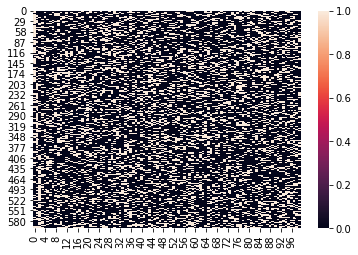

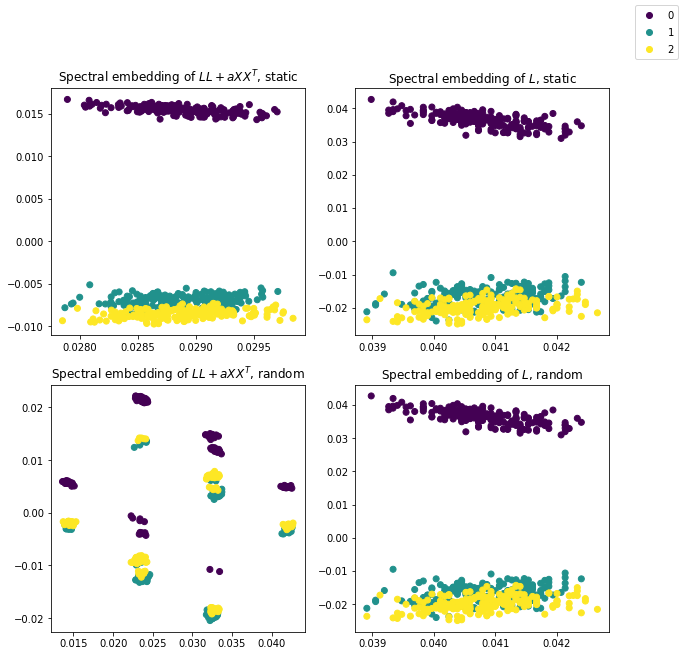

In [3]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, nclust=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, nclust), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, nclust))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)
X_static = gen_covariates(0.8, 0.3, labels, static=True)
X_many = gen_covariates(0.8, 0.3, labels, nclust=100)
X = gen_covariates(0.8, 0.3, labels)

sns.heatmap(X_many)

Xs = [X_static, X]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
axis[0, 1].set_title(r"Spectral embedding of $L$, static")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
axis[1, 1].set_title(r"Spectral embedding of $L$, random")
plt.gcf().legend(*scatter.legend_elements())


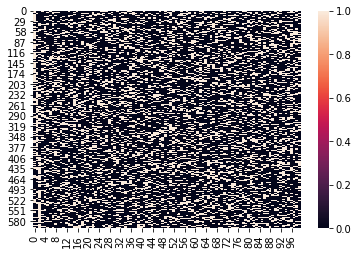

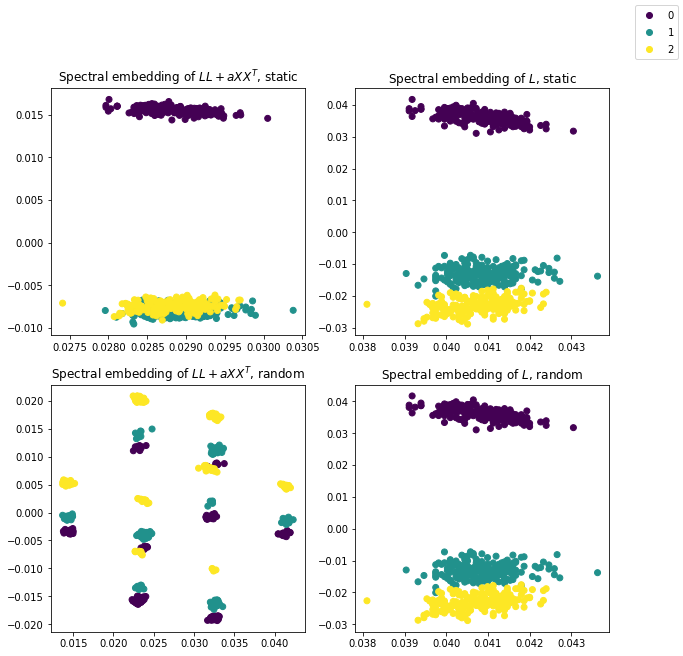

In [4]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, nclust=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, nclust), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, nclust))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)
X_static = gen_covariates(0.8, 0.3, labels, static=True)
X_many = gen_covariates(0.8, 0.3, labels, nclust=100)
X = gen_covariates(0.8, 0.3, labels)

sns.heatmap(X_many)

Xs = [X_static, X]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
axis[0, 1].set_title(r"Spectral embedding of $L$, static")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
axis[1, 1].set_title(r"Spectral embedding of $L$, random")
plt.gcf().legend(*scatter.legend_elements())


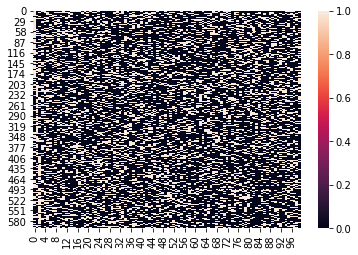

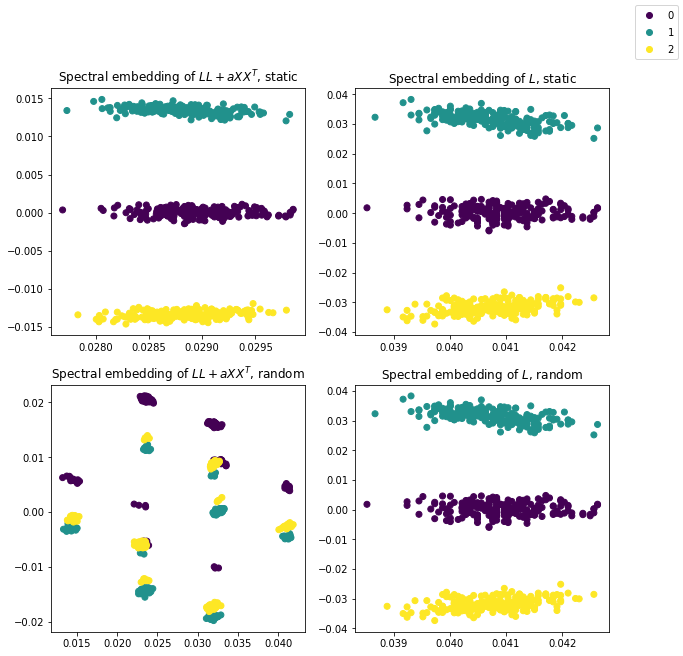

In [5]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, nclust=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, nclust), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, nclust))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)
X_static = gen_covariates(0.8, 0.3, labels, static=True)
X_many = gen_covariates(0.8, 0.3, labels, nclust=100)
X = gen_covariates(0.8, 0.3, labels)

sns.heatmap(X_many)

Xs = [X_static, X]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
axis[0, 1].set_title(r"Spectral embedding of $L$, static")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
axis[1, 1].set_title(r"Spectral embedding of $L$, random")
plt.gcf().legend(*scatter.legend_elements())


In [6]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, nclust=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, nclust), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, nclust))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(len(labels)))
m1_arr

# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, nclust=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


NameError: name 'm1' is not defined

In [7]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, nclust=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, nclust), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, nclust))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

m1_arr = np.random.choice([1, 0], p=[0.8, 1 - 0.8], size=(len(labels)))
m1_arr

# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, nclust=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, nclust=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, nclust), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, nclust))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array,
# where for the first 100 labels,
m1_arr = np.random.choice([1, 0], p=[0.8, 1 - 0.8], size=(len(labels)))
m1_arr
n


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, nclust=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


200

In [9]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, nclust=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, nclust), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, nclust))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for the first 100 labels,
m1_arr = np.random.choice([1, 0], p=[0.8, 1 - 0.8], size=(len(labels)))
m1_arr
A.shape


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, nclust=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


(600, 600)

In [10]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, nclust=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, nclust), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, nclust))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for the first 100 labels,
len(labels)
# m1_arr = np.random.choice([1, 0], p=[0.8, 1 - 0.8], size=(len(labels)))




# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, nclust=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


600

In [11]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, nclust=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, nclust), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, nclust))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for the first 100 labels,

m1_arr = np.random.choice([1, 0], p=[0.8, 1 - 0.8], size=(len(labels)))
labels





# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, nclust=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<AxesSubplot:>

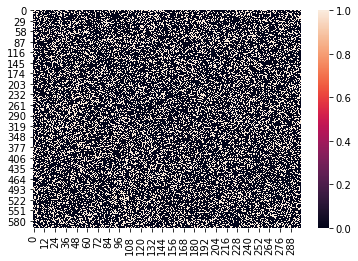

In [12]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
gen_covs = np.random.choice([1, 0], p=[m1, 1 - m1], size=(len(labels) // n_communities))
m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
X = m2_arr

sns.heatmap(X)


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


In [13]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda: np.random.choice([1, 0], p=[m1, 1 - m1], size=(len(labels) // n_communities))

# sns.heatmap(X)
len(labels) // n_communities

# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


200

In [14]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda: np.random.choice([1, 0], p=[m1, 1 - m1], size=(len(labels) // n_communities))
X[labels == 1]

# sns.heatmap(X)


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


array([[0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]])

In [15]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda: np.random.choice([1, 0], p=[m1, 1 - m1], size=(len(labels) // n_communities))
X[labels == 1].shape

# sns.heatmap(X)


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


(200, 300)

In [16]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda: np.random.choice([1, 0], p=[m1, 1 - m1], size=(len(labels) // n_communities))
X[labels == 0]

# sns.heatmap(X)


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<AxesSubplot:>

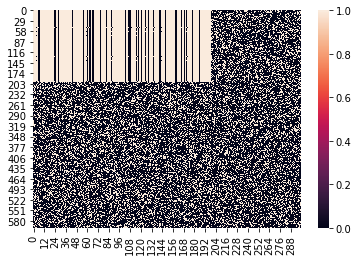

In [17]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda: np.random.choice([1, 0], p=[m1, 1 - m1], size=(len(labels) // n_communities))
X[labels == 0, :200] = gen_covs()

sns.heatmap(X)


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


In [18]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda: np.random.choice([1, 0], p=[m1, 1 - m1], size=(len(labels) // n_communities))
X[labels == 0, :100] = gen_covs()

sns.heatmap(X)


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


ValueError: shape mismatch: value array of shape (200,) could not be broadcast to indexing result of shape (200,100)

In [19]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size))
X[labels == 0, :100] = gen_covs((len(labels==0), 100))

sns.heatmap(X)


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


SyntaxError: unmatched ')' (<ipython-input-19-d9ee3f9218aa>, line 80)

In [20]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size))
X[labels == 0, :100] = gen_covs((len(labels==0), 100)))

sns.heatmap(X)


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


SyntaxError: unmatched ')' (<ipython-input-20-3edc4072237c>, line 80)

In [21]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size))
X[labels == 0, :100] = gen_covs((len(labels==0), 100))

sns.heatmap(X)


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


SyntaxError: unmatched ')' (<ipython-input-21-d9ee3f9218aa>, line 80)

In [22]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)
X[labels == 0, :100] = gen_covs((len(labels==0), 100))

sns.heatmap(X)


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


ValueError: shape mismatch: value array of shape (600,100) could not be broadcast to indexing result of shape (200,100)

<AxesSubplot:>

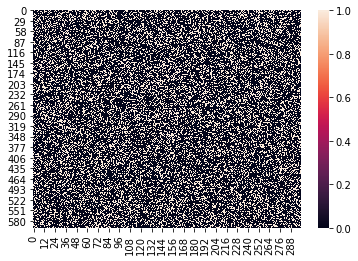

In [23]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)
X[labels == 0, :100].shape

sns.heatmap(X)


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


(200, 100)

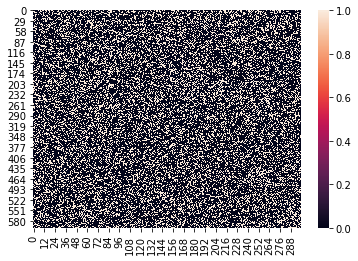

In [24]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)

sns.heatmap(X)
X[labels == 0, :100].shape


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


<AxesSubplot:>

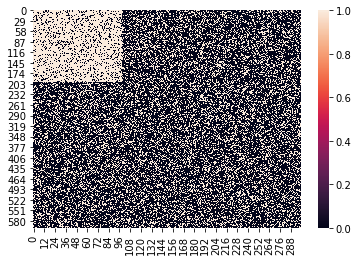

In [25]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)
X[labels == 0, :100] = gen_covs(size=X[labels==0, :100].shape)

sns.heatmap(X)


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


<AxesSubplot:>

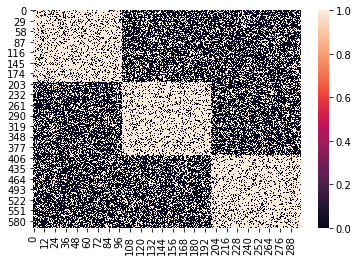

In [26]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
X = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)
X[labels == 0, :100] = gen_covs(size=X[labels == 0, :100].shape)
X[labels == 1, 100:200] = gen_covs(size=X[labels == 1, 100:200].shape)
X[labels == 2, 200:] = gen_covs(size=X[labels == 2, 200:].shape)

sns.heatmap(X)


# X_static = gen_covariates(0.8, 0.3, labels, static=True)
# X_many = gen_covariates(0.8, 0.3, labels, ndim=100)
# X = gen_covariates(0.8, 0.3, labels)

# sns.heatmap(X_many)

# Xs = [X_static, X]
# l = len(Xs)
# fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
# for i, x in enumerate(Xs):
#     casc = CASC(n_components=2)
#     lse = LaplacianSpectralEmbed(n_components=2)
#     casc.fit(A, x)
#     lse.fit(A)
#     Chat = casc.latent_left_
#     Ahat = lse.latent_left_
#     axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
#     scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

# axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
# axis[0, 1].set_title(r"Spectral embedding of $L$, static")
# axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
# axis[1, 1].set_title(r"Spectral embedding of $L$, random")
# plt.gcf().legend(*scatter.legend_elements())

# # %%


In [27]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)


X = gen_covariates(0.8, 0.3, labels)
X_static = gen_covariates(0.8, 0.3, labels, static=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)
X_many = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
X_many[labels == 0, :100] = gen_covs(size=X_many[labels == 0, :100].shape)
X_many[labels == 1, 100:200] = gen_covs(size=X_many[labels == 1, 100:200].shape)
X_many[labels == 2, 200:] = gen_covs(size=X_many[labels == 2, 200:].shape)


Xs = [X_static, X, x_many]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
axis[0, 1].set_title(r"Spectral embedding of $L$, static")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
axis[1, 1].set_title(r"Spectral embedding of $L$, random")
plt.gcf().legend(*scatter.legend_elements())


NameError: name 'x_many' is not defined

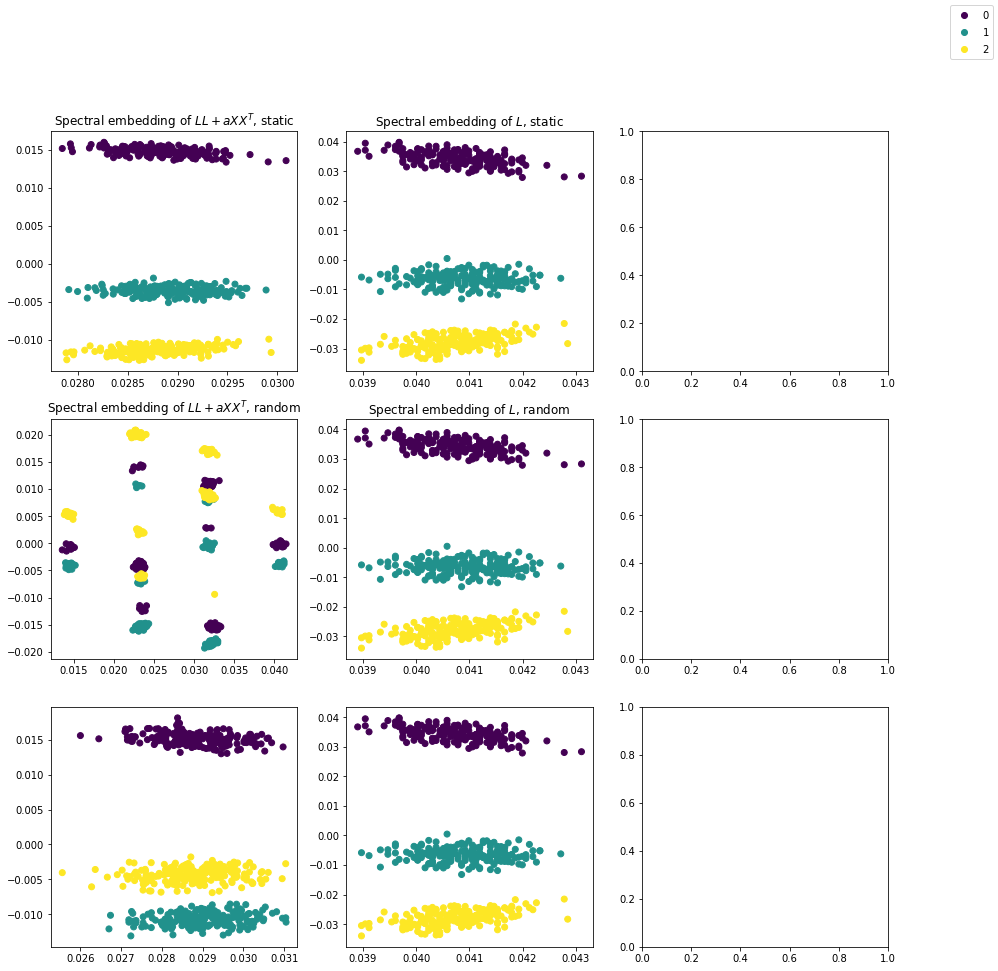

In [28]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)


X = gen_covariates(0.8, 0.3, labels)
X_static = gen_covariates(0.8, 0.3, labels, static=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)
X_many = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
X_many[labels == 0, :100] = gen_covs(size=X_many[labels == 0, :100].shape)
X_many[labels == 1, 100:200] = gen_covs(size=X_many[labels == 1, 100:200].shape)
X_many[labels == 2, 200:] = gen_covs(size=X_many[labels == 2, 200:].shape)


Xs = [X_static, X, X_many]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=l, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
axis[0, 1].set_title(r"Spectral embedding of $L$, static")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
axis[1, 1].set_title(r"Spectral embedding of $L$, random")
plt.gcf().legend(*scatter.legend_elements())


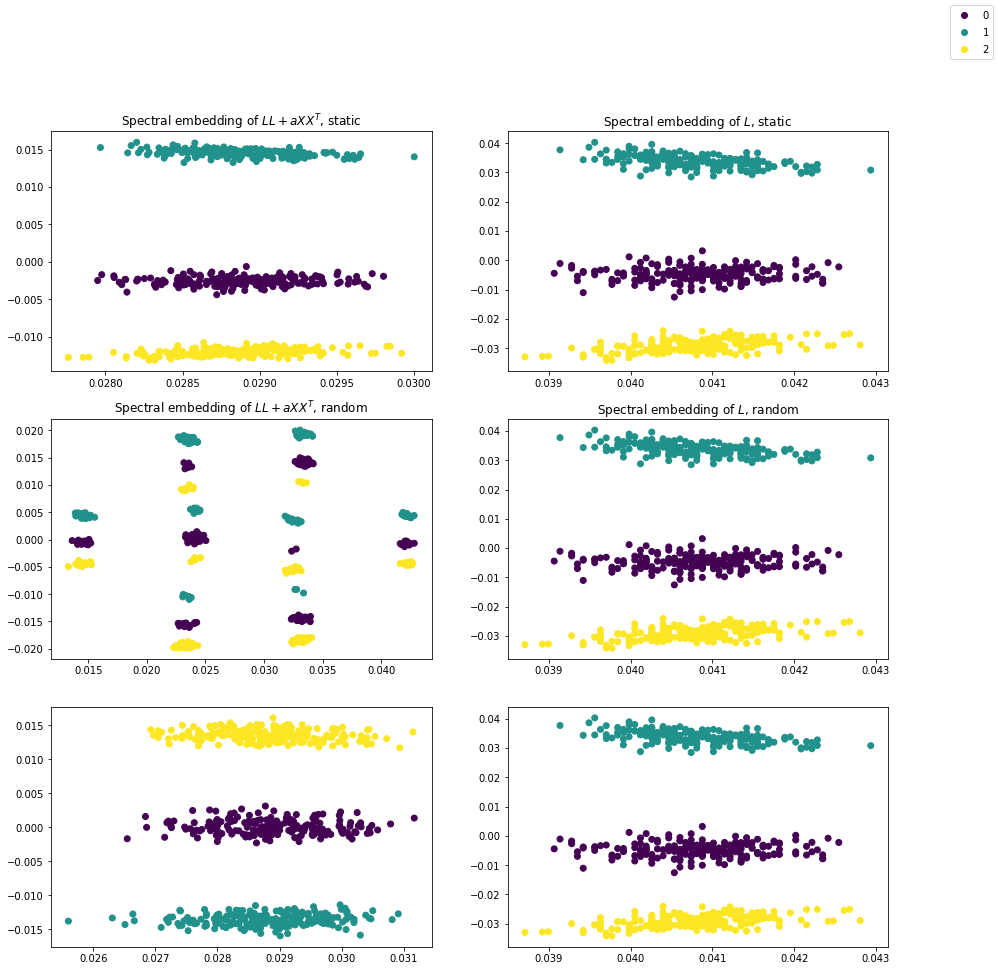

In [29]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)


X = gen_covariates(0.8, 0.3, labels)
X_static = gen_covariates(0.8, 0.3, labels, static=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)
X_many = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
X_many[labels == 0, :100] = gen_covs(size=X_many[labels == 0, :100].shape)
X_many[labels == 1, 100:200] = gen_covs(size=X_many[labels == 1, 100:200].shape)
X_many[labels == 2, 200:] = gen_covs(size=X_many[labels == 2, 200:].shape)


Xs = [X_static, X, X_many]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=2, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
axis[0, 1].set_title(r"Spectral embedding of $L$, static")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
axis[1, 1].set_title(r"Spectral embedding of $L$, random")
plt.gcf().legend(*scatter.legend_elements())


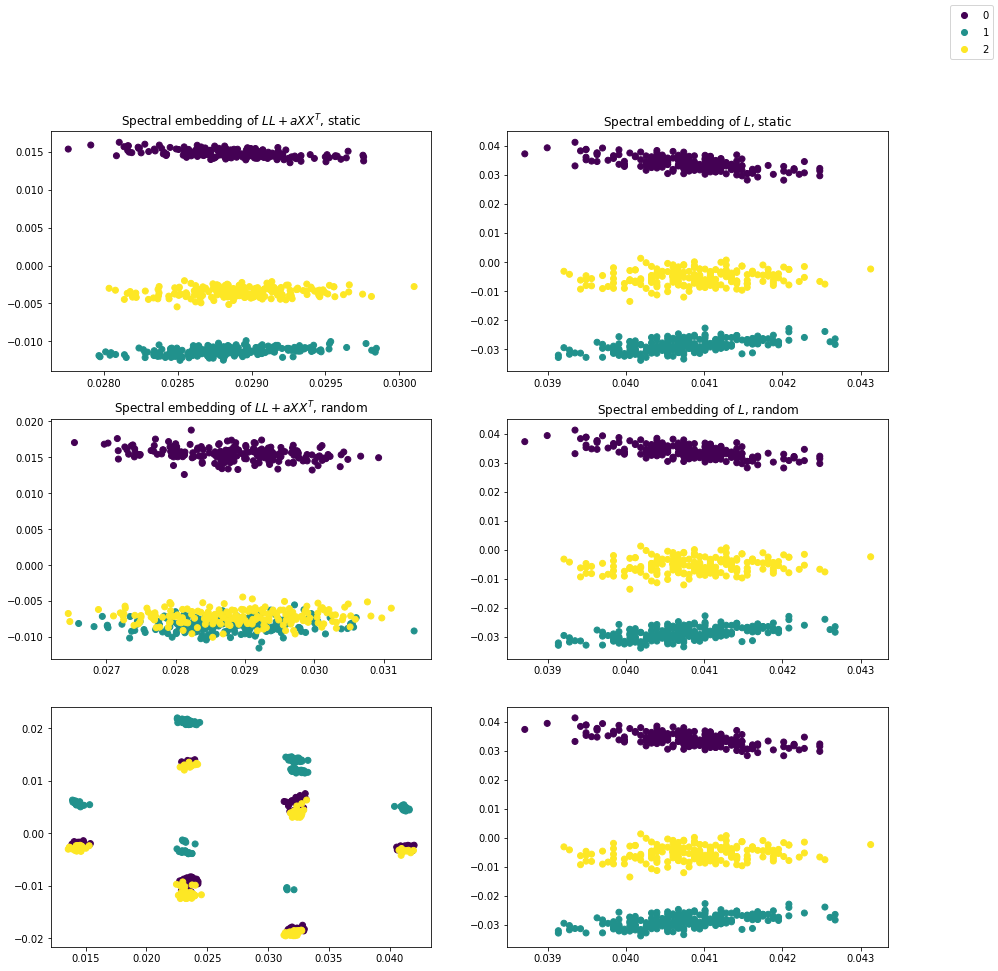

In [30]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)


X = gen_covariates(0.8, 0.3, labels)
X_static = gen_covariates(0.8, 0.3, labels, static=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)
X_many = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
X_many[labels == 0, :100] = gen_covs(size=X_many[labels == 0, :100].shape)
X_many[labels == 1, 100:200] = gen_covs(size=X_many[labels == 1, 100:200].shape)
X_many[labels == 2, 200:] = gen_covs(size=X_many[labels == 2, 200:].shape)


Xs = [X_static, X_many, X,]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=2, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
axis[0, 1].set_title(r"Spectral embedding of $L$, static")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, random")
axis[1, 1].set_title(r"Spectral embedding of $L$, random")
plt.gcf().legend(*scatter.legend_elements())


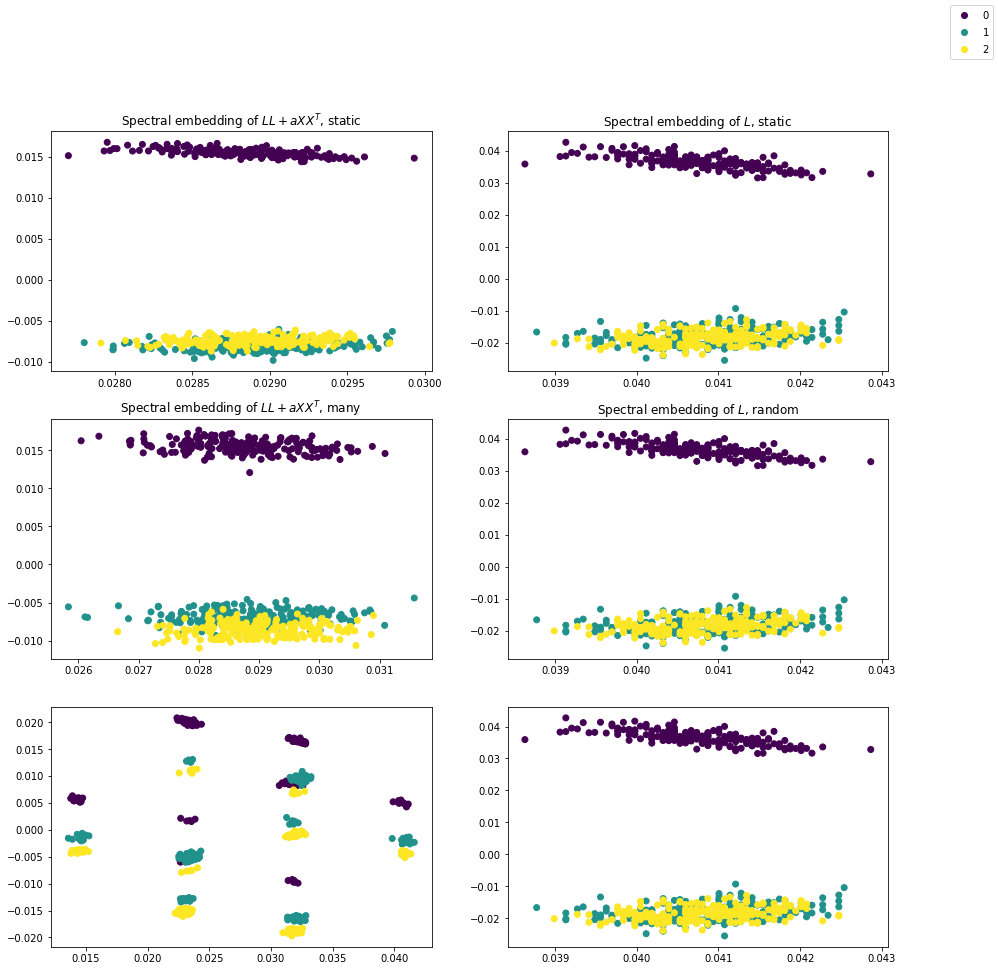

In [31]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)


X = gen_covariates(0.8, 0.3, labels)
X_static = gen_covariates(0.8, 0.3, labels, static=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)
X_many = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
X_many[labels == 0, :100] = gen_covs(size=X_many[labels == 0, :100].shape)
X_many[labels == 1, 100:200] = gen_covs(size=X_many[labels == 1, 100:200].shape)
X_many[labels == 2, 200:] = gen_covs(size=X_many[labels == 2, 200:].shape)


Xs = [
    X_static,
    X_many,
    X,
]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=2, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
axis[0, 1].set_title(r"Spectral embedding of $L$, static")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, many")
axis[1, 1].set_title(r"Spectral embedding of $L$, random")
plt.gcf().legend(*scatter.legend_elements())


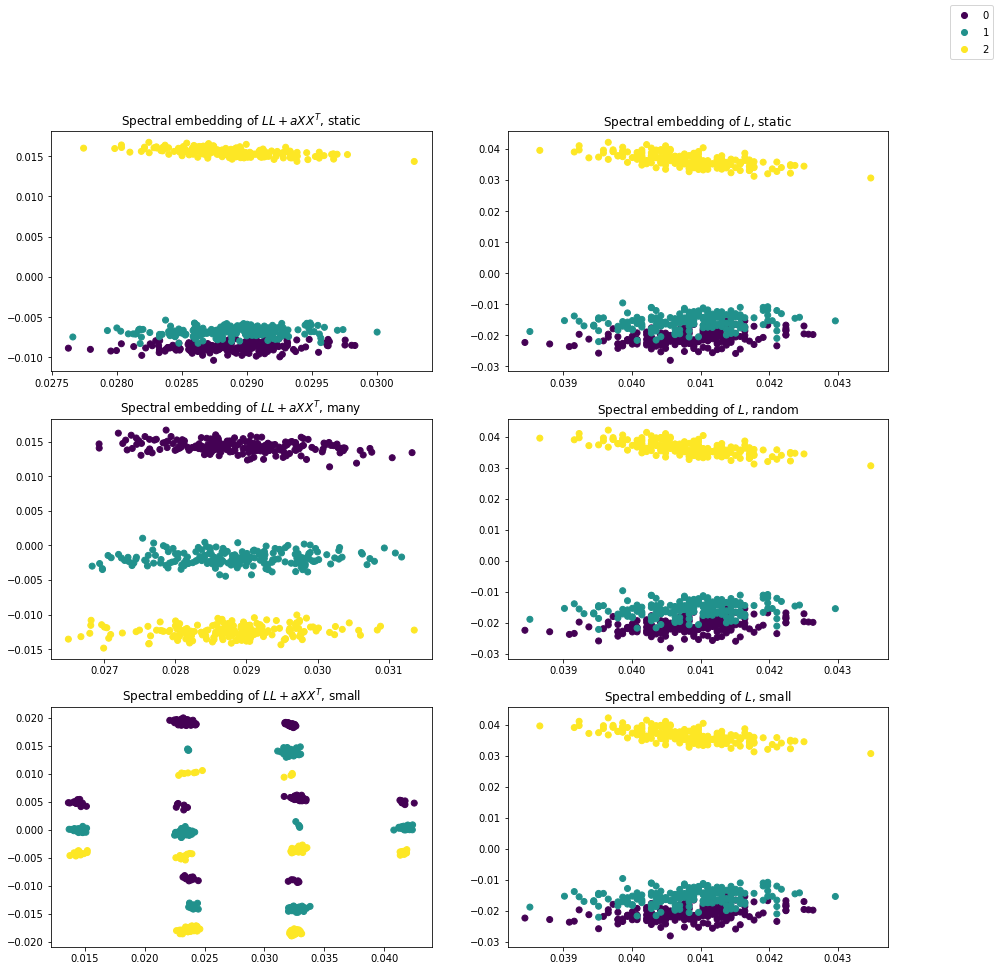

In [32]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)


X = gen_covariates(0.8, 0.3, labels)
X_static = gen_covariates(0.8, 0.3, labels, static=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)
X_many = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
X_many[labels == 0, :100] = gen_covs(size=X_many[labels == 0, :100].shape)
X_many[labels == 1, 100:200] = gen_covs(size=X_many[labels == 1, 100:200].shape)
X_many[labels == 2, 200:] = gen_covs(size=X_many[labels == 2, 200:].shape)


Xs = [
    X_static,
    X_many,
    X,
]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=2, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
axis[0, 1].set_title(r"Spectral embedding of $L$, static")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, many")
axis[1, 1].set_title(r"Spectral embedding of $L$, random")
axis[2, 0].set_title(r"Spectral embedding of $LL + aXX^T$, small")
axis[2, 1].set_title(r"Spectral embedding of $L$, small")
plt.gcf().legend(*scatter.legend_elements())


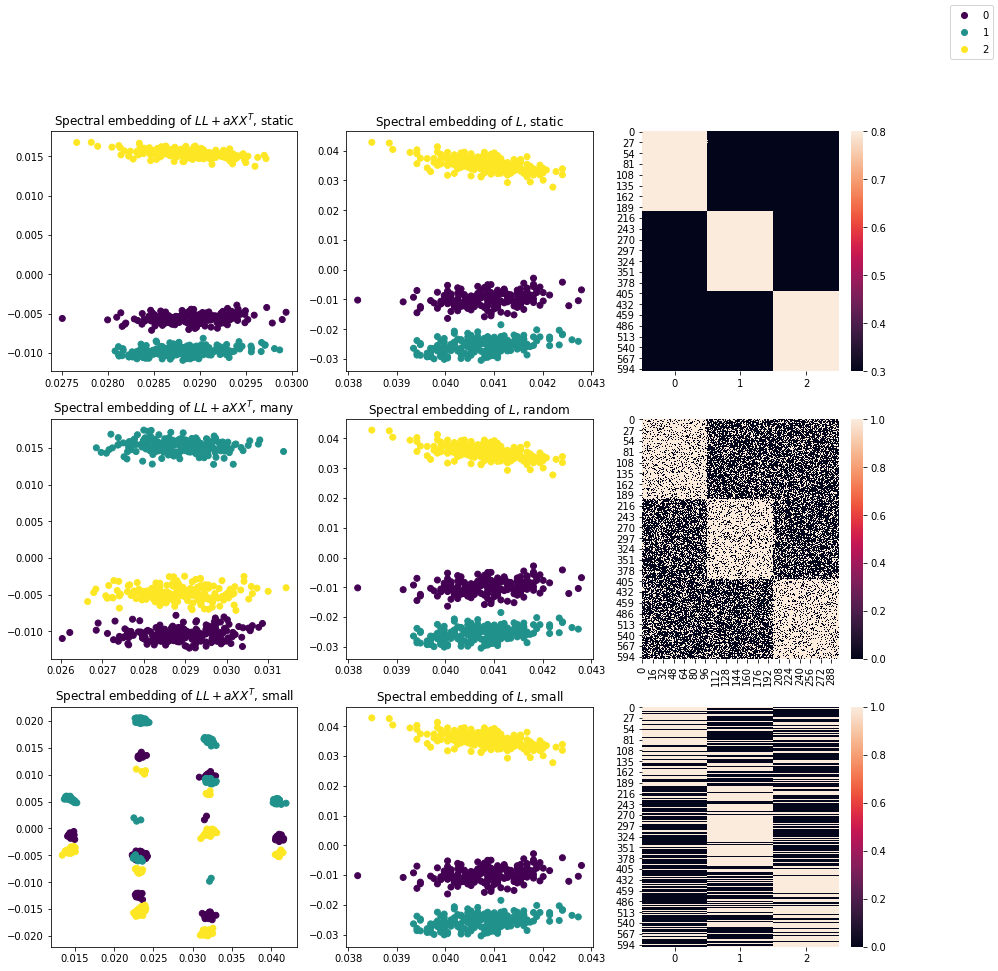

In [33]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)


X = gen_covariates(0.8, 0.3, labels)
X_static = gen_covariates(0.8, 0.3, labels, static=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)
X_many = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
X_many[labels == 0, :100] = gen_covs(size=X_many[labels == 0, :100].shape)
X_many[labels == 1, 100:200] = gen_covs(size=X_many[labels == 1, 100:200].shape)
X_many[labels == 2, 200:] = gen_covs(size=X_many[labels == 2, 200:].shape)


Xs = [
    X_static,
    X_many,
    X,
]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=3, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)
    sns.heatmap(
        x,
        ax=axis[i, 2],
    )

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$, static")
axis[0, 1].set_title(r"Spectral embedding of $L$, static")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, many")
axis[1, 1].set_title(r"Spectral embedding of $L$, random")
axis[2, 0].set_title(r"Spectral embedding of $LL + aXX^T$, small")
axis[2, 1].set_title(r"Spectral embedding of $L$, small")
plt.gcf().legend(*scatter.legend_elements())


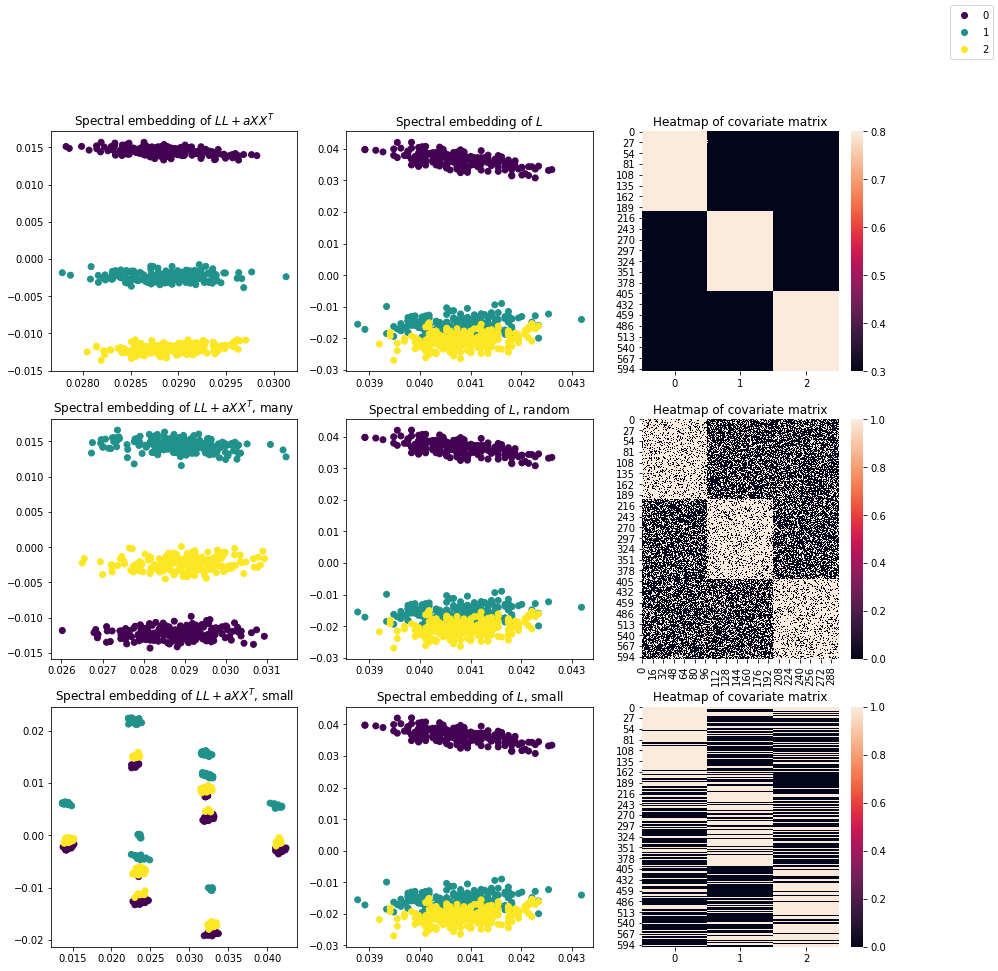

In [34]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)


X = gen_covariates(0.8, 0.3, labels)
X_static = gen_covariates(0.8, 0.3, labels, static=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)
X_many = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
X_many[labels == 0, :100] = gen_covs(size=X_many[labels == 0, :100].shape)
X_many[labels == 1, 100:200] = gen_covs(size=X_many[labels == 1, 100:200].shape)
X_many[labels == 2, 200:] = gen_covs(size=X_many[labels == 2, 200:].shape)


Xs = [
    X_static,
    X_many,
    X,
]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=3, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)
    sns.heatmap(
        x,
        ax=axis[i, 2],
    )

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$")
axis[0, 1].set_title(r"Spectral embedding of $L$")
axis[0, 2].set_title(r"Heatmap of covariate matrix")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$, many")
axis[1, 1].set_title(r"Spectral embedding of $L$, random")
axis[1, 2].set_title(r"Heatmap of covariate matrix")
axis[2, 0].set_title(r"Spectral embedding of $LL + aXX^T$, small")
axis[2, 1].set_title(r"Spectral embedding of $L$, small")
axis[2, 2].set_title(r"Heatmap of covariate matrix")
plt.gcf().legend(*scatter.legend_elements())


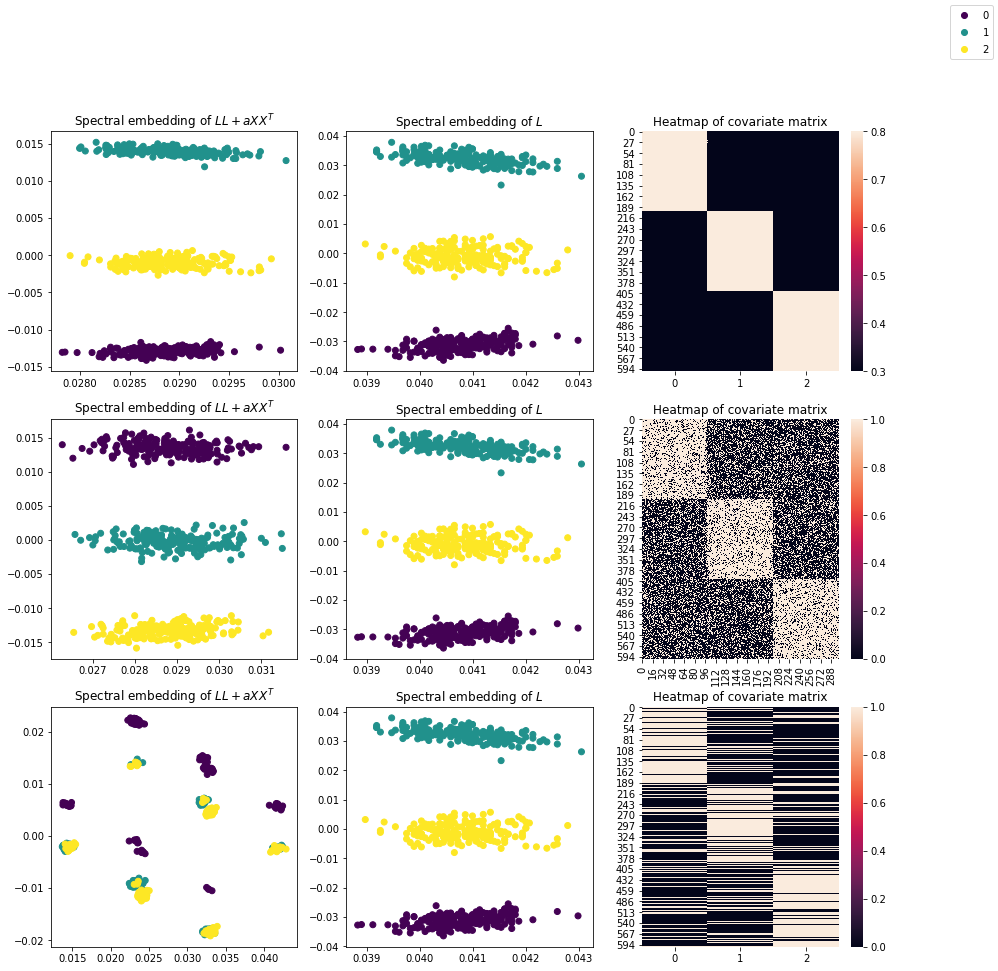

In [35]:
from graspologic.utils import import_graph, to_laplacian
from graspologic.embed.base import BaseSpectralEmbed
from graspologic.embed.lse import LaplacianSpectralEmbed
from graspologic.simulations import sbm
from graspologic.plot import heatmap

import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns


class CASC(BaseSpectralEmbed):
    # TODO: everything
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.assortive_ = False
        self.is_fitted_ = False

    def fit(self, graph, covariates, y=None):
        # setup
        A = import_graph(graph)
        X = covariates.copy()

        # workhorse code
        L = to_laplacian(A, form="R-DAD")
        LL = L if self.assortive_ else L @ L
        XX = X @ X.T
        a = self._get_tuning_parameter(LL, XX)
        L_ = LL + a * (XX)
        self._reduce_dim(L_)

        self.is_fitted_ = True
        return self

    def transform(self, graph, y=None):
        A = import_graph(graph)
        pass

    def _get_tuning_parameter(self, LL, XX):
        """
        Find an a which causes the leading eigenvectors of L@L and a*X@X.T to be the same.
        """
        L_leading = np.linalg.eigvalsh(LL)[-1]
        X_leading = np.linalg.eigvalsh(XX)[-1]
        return np.float(L_leading / X_leading)


def gen_covariates(m1, m2, labels, ndim=3, static=False):
    # TODO: make sure labels is 1d array-like
    n = len(labels)

    if static:
        m1_arr = np.full(n, m1)
        m2_arr = np.full((n, ndim), m2)
        m2_arr[np.arange(n), labels] = m1_arr
    elif not static:
        m1_arr = np.random.choice([1, 0], p=[m1, 1 - m1], size=(n))
        m2_arr = np.random.choice([1, 0], p=[m2, 1 - m2], size=(n, ndim))
        m2_arr[np.arange(n), labels] = m1_arr

    return m2_arr


# setup
n = 200
n_communities = 3
p, q = 0.9, 0.3
B = np.array([[p, q, q], [q, p, q], [q, q, p]])
B2 = np.array([[q, p, p], [p, q, p], [p, p, q]])
A, labels = sbm([n, n, n], B, return_labels=True)


X = gen_covariates(0.8, 0.3, labels)
X_static = gen_covariates(0.8, 0.3, labels, static=True)

# generate nx300 array, n=200,
# where for label == 0, the first 100 covariates have prob m1, else m2
m1 = 0.8
m2 = 0.3
ndim = 300
gen_covs = lambda size: np.random.choice([1, 0], p=[m1, 1 - m1], size=size)
X_many = np.random.choice([1, 0], p=[m2, 1 - m2], size=(len(labels), ndim))
X_many[labels == 0, :100] = gen_covs(size=X_many[labels == 0, :100].shape)
X_many[labels == 1, 100:200] = gen_covs(size=X_many[labels == 1, 100:200].shape)
X_many[labels == 2, 200:] = gen_covs(size=X_many[labels == 2, 200:].shape)


Xs = [
    X_static,
    X_many,
    X,
]
l = len(Xs)
fig, axis = plt.subplots(nrows=l, ncols=3, figsize=(5 * l, 5 * l))
for i, x in enumerate(Xs):
    casc = CASC(n_components=2)
    lse = LaplacianSpectralEmbed(n_components=2)
    casc.fit(A, x)
    lse.fit(A)
    Chat = casc.latent_left_
    Ahat = lse.latent_left_
    axis[i, 0].scatter(Chat[:, 0], Chat[:, 1], c=labels)
    scatter = axis[i, 1].scatter(Ahat[:, 0], Ahat[:, 1], c=labels)
    sns.heatmap(
        x,
        ax=axis[i, 2],
    )

axis[0, 0].set_title(r"Spectral embedding of $LL + aXX^T$")
axis[0, 1].set_title(r"Spectral embedding of $L$")
axis[0, 2].set_title(r"Heatmap of covariate matrix")
axis[1, 0].set_title(r"Spectral embedding of $LL + aXX^T$")
axis[1, 1].set_title(r"Spectral embedding of $L$")
axis[1, 2].set_title(r"Heatmap of covariate matrix")
axis[2, 0].set_title(r"Spectral embedding of $LL + aXX^T$")
axis[2, 1].set_title(r"Spectral embedding of $L$")
axis[2, 2].set_title(r"Heatmap of covariate matrix")
plt.gcf().legend(*scatter.legend_elements())
